In [104]:
#라이브러리 import
#77(1월부터 3월 몇일까지 api불러와지는데 날짜 차이), 73(8월부터 10월 13일까지 날짜차이)
#pip install koreanize-matplotlib

from bs4 import BeautifulSoup
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings(action='ignore')

service_key = 'R017PAhYQlGAvSZfK0RPheUkBZQ2nKrmyPW3ZljGs8oWBVXOTEUcfRzjwc2jZg6NaZ6SJUlVaC6AWvGewC1o8A=='

# url 입력, url1은 발매채널별 승차권 현황, url2는 SR운영역 승차권 발매 현황, URL3은 연도별 SR승차권 발매현황, URL4는 특실/일반실 승차인원
url1 = 'https://apis.data.go.kr/B553912/tk_sales/v1/channel_sales'
url2 = 'https://apis.data.go.kr/B553912/tk_sales/v1/srt_station_sales'
url3 = 'https://apis.data.go.kr/B553912/srt_passenger/v1/station_passengers?serviceKey=R017PAhYQlGAvSZfK0RPheUkBZQ2nKrmyPW3ZljGs8oWBVXOTEUcfRzjwc2jZg6NaZ6SJUlVaC6AWvGewC1o8A%3D%3D&page=1&perPage=20000&cond%5BRUN_YM%3A%3ALT%5D=202312&cond%5BRUN_YM%3A%3ALTE%5D=202312&cond%5BRUN_YM%3A%3AGT%5D=202201&cond%5BRUN_YM%3A%3AGTE%5D=202201'


# 결과를 저장할 리스트, url 리스트 추가 
results = []
li = [url1,url2]

#파라미터 설정
params = {
    'serviceKey':service_key,
    'page':1,
    'perPage':20000,
    'returnType':'json',
    'cond[RUN_YMD::LT]':'20231231',
    'cond[RUN_YMD::GTE]':'20230101'
    }

for i in li:
    response = requests.get(i, params=params)
    contents = response.text
    json_data = json.loads(response.content)
    df = pd.DataFrame(json_data['data'])
    results.append(df)

response = requests.get(url3)
data = pd.DataFrame(json.loads(response.content)['data'])
    
by_channel = results[0]
by_station = results[1]

    

In [105]:
stop_station = data
stop_station

,ARVL_STN_CD,ARVL_STN_NM,DPT_STN_CD,DPT_STN_NM,RUN_YM,TKCAR_NMPR_CNT
0,0015,동대구,0010,대전,202208,12076
1,0020,부산,0010,대전,202208,19611
2,0297,오송,0010,대전,202208,2313
3,0502,천안아산,0010,대전,202208,5064
4,0506,서대구,0010,대전,202208,1696
...,...,...,...,...,...,...
4293,0512,창원중앙,0553,평택지제,202311,472
4294,0514,공주,0553,평택지제,202311,136
4295,0515,포항,0553,평택지제,202311,333
4296,0551,수서,0553,평택지제,202311,43331


In [106]:
#데이터 열 이름 바꾸기

by_channel = by_channel.rename(columns={'PRT_CMPTN_QNTY':'인쇄완료수량',
                          'RFND_QNTY':'환불수',
                          'ROUTE_NM':'노선명',
                          'RUN_YMD':'운행일자',
                          'SELLNG_QNTY':'발매수량',
                          'SELLNG_WICKET_KND_CD':'발매창구종류코드',
                          'SELLNG_WICKET_KND_NM':'발매창구종류명',
                          'SELLNG_YMD':'발매일자'})

by_station = by_station.rename(columns={'PRT_CMPTN_QNTY':'인쇄완료수량',
                          'RFND_QNTY':'환불수',
                          'ROUTE_NM':'노선명',
                          'RUN_YMD':'운행일자',
                          'SELLNG_QNTY':'발매수량',
                          'SELLNG_STN_NM':'발매역명',
                          'SELLNG_YMD':'발매일자',
                          'SELLNG_STN_CD':'발매역코드'})

stop_station = stop_station.rename(columns={'ARVL_STN_CD':'도착역코드',
                                           'ARVL_STN_NM':'도착역명',
                                           'DPT_STN_CD':'출발역코드',
                                           'DPT_STN_NM':'출발역명',
                                           'RUN_YM':'운행연월',
                                           'TKCAR_NMPR_CNT':'승차인원수'})

In [168]:
by_channel[by_channel['발매창구종류명']=='스마트폰']

,인쇄완료수량,환불수,노선명,운행일자,발매수량,발매창구종류코드,발매창구종류명,발매일자,환불정도,날짜차이
3,3972,4329,경부선,2023-01-01,8315,0077,스마트폰,2022-12-01,0.520625,31 days
6,1060,1239,호남선,2023-01-01,2299,0077,스마트폰,2022-12-01,0.538930,31 days
10,1456,1850,경부선,2023-01-01,3308,0077,스마트폰,2022-12-02,0.559250,30 days
13,529,562,호남선,2023-01-01,1093,0077,스마트폰,2022-12-02,0.514181,30 days
18,1025,1148,경부선,2023-01-01,2180,0077,스마트폰,2022-12-03,0.526606,29 days
...,...,...,...,...,...,...,...,...,...,...
19981,1017,873,경부선,2023-03-19,1894,0077,스마트폰,2023-03-03,0.460929,16 days
19984,310,362,호남선,2023-03-19,677,0077,스마트폰,2023-03-03,0.534712,16 days
19988,807,792,경부선,2023-03-19,1601,0077,스마트폰,2023-03-04,0.494691,15 days
19991,320,244,호남선,2023-03-19,567,0077,스마트폰,2023-03-04,0.430335,15 days


In [108]:
# 환불 퍼센트 계산과 발매일과 운행일의 차이 열 생성
# 환불 퍼센트 계산은 미리 예매해놓고 환불하는 사람들이 있다고 해서 어느정도로 많을지 보고 싶어서,
# 발매일과 운행일 차이열 생성은 보통 티켓이 운행일과 발매일의 몇일 차이를 두고 생성되는 지 알고 싶어서.

by_channel['환불정도'] = by_channel['환불수']/by_channel['발매수량']
by_channel['운행일자'], by_channel['발매일자'] = pd.to_datetime(by_channel['운행일자'],format='%Y%m%d'), pd.to_datetime(by_channel['발매일자'], format='%Y%m%d')
by_channel['날짜차이'] = by_channel['운행일자'] - by_channel['발매일자']

<Axes: xlabel='발매창구종류명', ylabel='발매수량'>

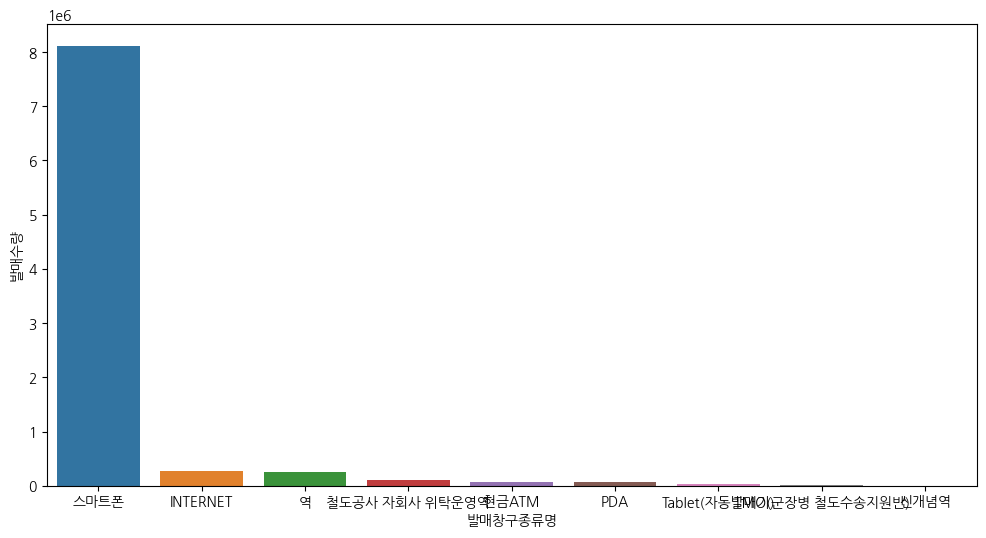

In [109]:
#가장 많이 티켓을 발매하는 곳은 어디일까? (channel)

table = pd.pivot_table(by_channel,values='발매수량',index='발매창구종류명',aggfunc='sum').sort_values(ascending=False,by='발매수량')
plt.figure(figsize=(12,6))
sns.barplot(table, x=table.index, y='발매수량')

([<matplotlib.patches.Wedge at 0x1972c3f9dd0>,
 [Text(-0.22289678843987573, 1.077180125003794, '경부선'),
  Text(0.2228967884398756, -1.0771801250037942, '호남선')],
 [Text(-0.12158006642175037, 0.5875527954566149, '56.5%'),
  Text(0.12158006642175032, -0.587552795456615, '43.5%')])

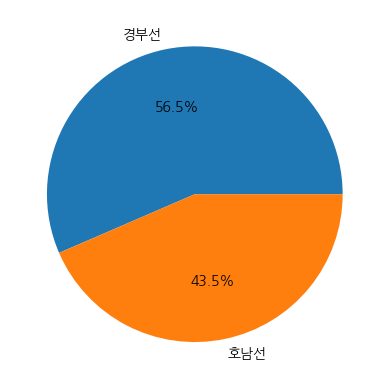

In [110]:
#가장 운행을 많이 하는 노선은 어디일까? (channel)

label=['경부선','호남선']
values=[0.56495, 0.43505]
by_channel['노선명'].value_counts(normalize=True)
plt.pie(values,labels=label, autopct='%.1f%%')

(0.0, 6000.0)

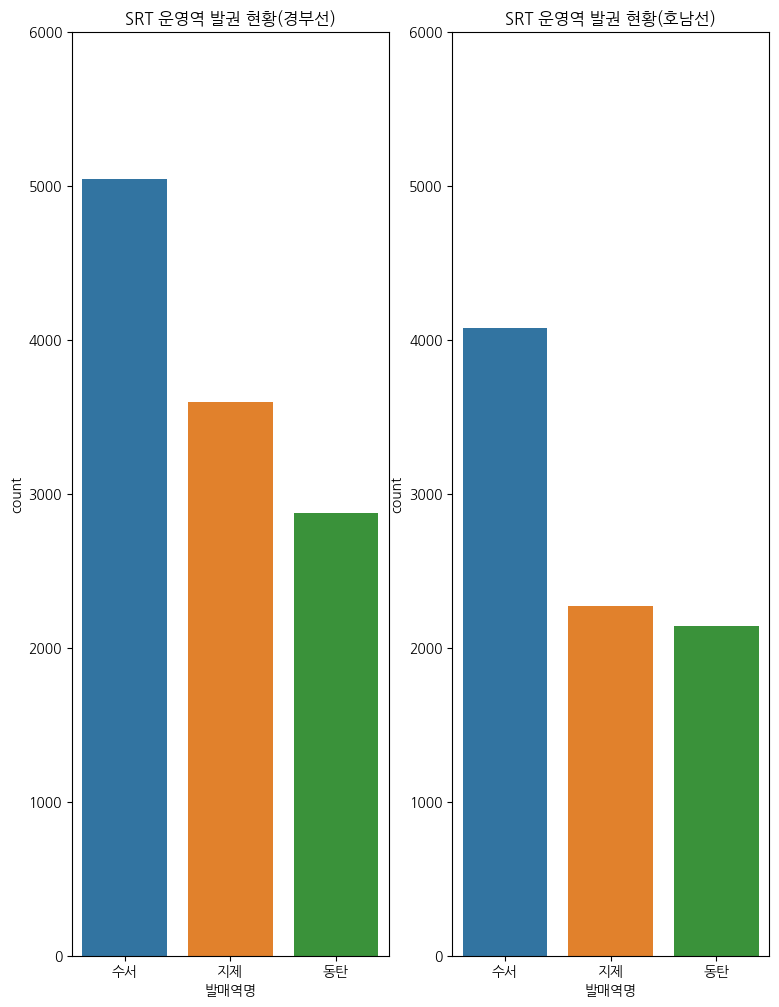

In [111]:
#경부선이 많은 이유는? (channel)
#일반적으로 수서,지제,동탄역을 이용하는 경부선 이용자가 단순히 호남선보다 상대적으로 많기 떄문이라고 생각됨.

k1 = by_station.loc[by_station['노선명']=='경부선']['발매역명'].value_counts().reset_index()
h1 = by_station.loc[by_station['노선명']=='호남선']['발매역명'].value_counts().reset_index()

fig, axs = plt.subplots(1,2, figsize=(9,12))
ax1 = axs[0]
sns.barplot(data=k1, x='발매역명', y='count', ax=ax1)
ax1.set_title('SRT 운영역 발권 현황(경부선)')
ax1.set_ylim(0,6000)

ax2 = axs[1]
sns.barplot(data=h1, x='발매역명', y='count', ax=ax2)
ax2.set_title('SRT 운영역 발권 현황(호남선)')
ax2.set_ylim(0,6000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '0 days 00:00:00'),
  Text(1, 0, '1 days 00:00:00'),
  Text(2, 0, '2 days 00:00:00'),
  Text(3, 0, '3 days 00:00:00'),
  Text(4, 0, '4 days 00:00:00'),
  Text(5, 0, '5 days 00:00:00'),
  Text(6, 0, '6 days 00:00:00'),
  Text(7, 0, '7 days 00:00:00'),
  Text(8, 0, '8 days 00:00:00'),
  Text(9, 0, '9 days 00:00:00'),
  Text(10, 0, '10 days 00:00:00'),
  Text(11, 0, '11 days 00:00:00'),
  Text(12, 0, '12 days 00:00:00'),
  Text(13, 0, '13 days 00:00:00'),
  Text(14, 0, '14 days 00:00:00'),
  Text(15, 0, '15 days 00:00:00'),
  Text(16, 0, '16 days 00:00:00'),
  Text(17, 0, '17 days 00:00:00'),
  Text(18, 0, '18 days 00:00:00'),
  Text(19, 0, '19 days 00:00:00'),
  Text(20, 0, '20 days 00:00:00'),
  Text(21, 0, '21 days 00:00:00'),
  Text(22, 0, '22 days 00:00:00'),
  Text(23, 0, '23 days 00:00:00'),
  Text(24, 0, '24 days 00:00:00'),

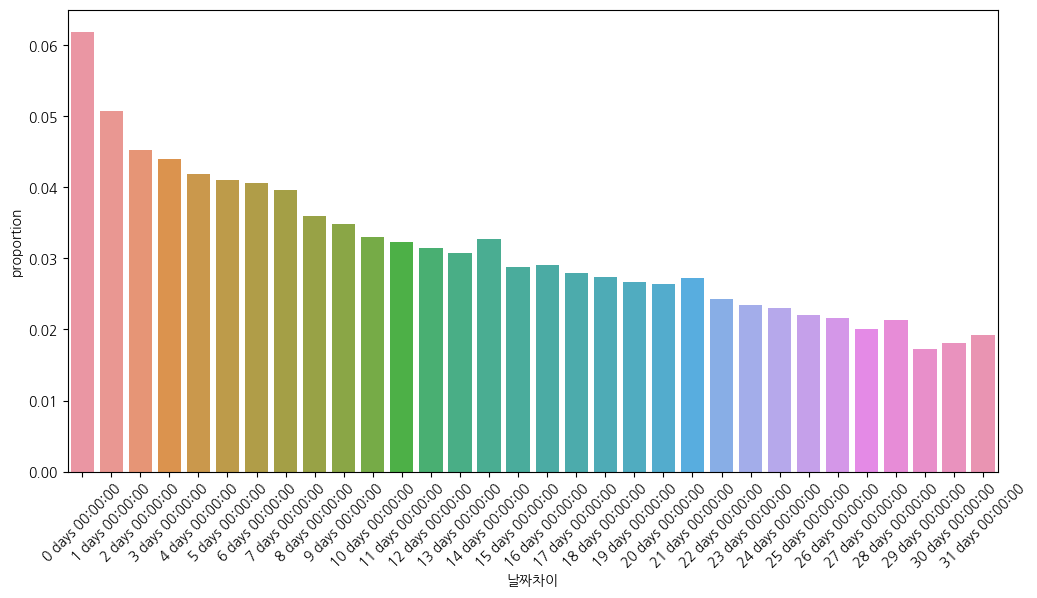

In [112]:
#운행일과 예매일의 차이는 어느정도일까? (channel)

table = by_channel['날짜차이'].value_counts(normalize=True).sort_index().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(table, x='날짜차이', y='proportion')
plt.xticks(rotation=45)

In [113]:
#환불 정도 보기1(경부선)(발급 방법은 스마트폰 기준)(refund)
#for문 안의 d1,d2에서 운행일자 열에서 값 한 개만 datetime 속성을 가진 값으로 가져올 수 있는 방법... numpy.ndarray 값이라 가져오기 까다로움 

gyungbu = by_channel[by_channel['노선명']=='경부선']
honam = by_channel[by_channel['노선명']=='호남선']

k_day = []
k_refund = []
k_tickets = []
k_day_before = []

h_day = []
h_refund = []
h_tickets = []
h_day_before = []

for i in range(1,4):
    for j in range(1,32):
        if i == 2 and j >=29:
            continue
        else:
            d1 = gyungbu[(gyungbu['운행일자']==f'2023-{i}-{j}') & (gyungbu['발매창구종류명']=='스마트폰')]['운행일자']
            d1 = d1.drop_duplicates(inplace=True)
            r1 = gyungbu[(gyungbu['운행일자']==f'2023-{i}-{j}') & (gyungbu['발매창구종류명']=='스마트폰')]['환불정도'].mean()
            t1 = gyungbu[(gyungbu['운행일자']==f'2023-{i}-{j}') & (gyungbu['발매창구종류명']=='스마트폰')]['발매수량'].sum()
            b1 = gyungbu[(gyungbu['운행일자']==f'2023-{i}-{j}') & (gyungbu['발매창구종류명']=='스마트폰')]['날짜차이'].mean()
            d2 = honam[(honam['운행일자']==f'2023-{i}-{j}') & (honam['발매창구종류명']=='스마트폰')]['운행일자']
            d2 = d2.drop_duplicates(inplace=True)
            r2 = honam[(honam['운행일자']==f'2023-{i}-{j}') & (honam['발매창구종류명']=='스마트폰')]['환불정도'].mean()
            t2 = honam[(honam['운행일자']==f'2023-{i}-{j}') & (honam['발매창구종류명']=='스마트폰')]['발매수량'].sum()
            b2 = honam[(honam['운행일자']==f'2023-{i}-{j}') & (honam['발매창구종류명']=='스마트폰')]['날짜차이'].mean()
            k_day.append(d1), k_refund.append(r1), k_tickets.append(t1), k_day_before.append(b1), h_day.append(d2), h_refund.append(r2), h_tickets.append(t2), h_day_before.append(b2)

refund_gyungbu = pd.DataFrame({'일':k_day,
                              '환불정도':k_refund,
                              '총 티켓 수':k_tickets,
                              '평균구입일자':k_day_before})

refund_honam = pd.DataFrame({'일':h_day,
                              '환불정도':h_refund,
                              '총 티켓 수':h_tickets,
                             '평균구입일자':h_day_before})
#gyungbu[(gyungbu['발매창구종류명']=='스마트폰') & (gyungbu['운행일자']=='2023-1-2')]
#plt.subplots(1,2,1)

In [114]:
gyungbu[(gyungbu['운행일자']=='2023-1-1') & (gyungbu['발매창구종류명']=='스마트폰')]['날짜차이'].mean()

Timedelta('15 days 12:00:00')

In [115]:
gyungbu[(gyungbu['운행일자']=='2023-02-03') & (gyungbu['발매창구종류명']=='스마트폰')]['운행일자'].dt.strftime('%Y-%m-%d').drop_duplicates().values

array(['2023-02-03'], dtype=object)

In [116]:
#데이터프레임이 잘 생성되었는지 확인 -> 일 열이 날라갔으므로 일 열에 들어갈 값을 추가, 
refund_gyungbu['일'] = pd.Series(pd.date_range('1/1/2023', periods=78, freq='D'))
refund_honam.head()
refund_honam['일'] = pd.Series(pd.date_range('1/1/2023', periods=78, freq='D'))
print(refund_honam)

            일      환불정도  총 티켓 수           평균구입일자
0  2023-01-01  0.578677   33928 15 days 12:00:00
1  2023-01-02  0.504590   27060 15 days 12:00:00
2  2023-01-03  0.471248   22160 15 days 12:00:00
3  2023-01-04  0.465231   22915 15 days 12:00:00
4  2023-01-05  0.465673   24693 15 days 12:00:00
..        ...       ...     ...              ...
85        NaT       NaN       0              NaT
86        NaT       NaN       0              NaT
87        NaT       NaN       0              NaT
88        NaT       NaN       0              NaT
89        NaT       NaN       0              NaT

[90 rows x 4 columns]


In [117]:
refund_honam

,일,환불정도,총 티켓 수,평균구입일자
0,2023-01-01,0.578677,33928,15 days 12:00:00
1,2023-01-02,0.504590,27060,15 days 12:00:00
2,2023-01-03,0.471248,22160,15 days 12:00:00
3,2023-01-04,0.465231,22915,15 days 12:00:00
4,2023-01-05,0.465673,24693,15 days 12:00:00
...,...,...,...,...
85,NaT,NaN,0,NaT
86,NaT,NaN,0,NaT
87,NaT,NaN,0,NaT
88,NaT,NaN,0,NaT


In [118]:
#row 데이터가 20000개까지 출력이 안되는데 날짜로 치면 1월 1일이후 78일정도까지밖에 데이터가 추출이 안되는데 행이 90일 데이터까지 추출되어서 '총 티켓 수' 0인 걸 드랍
#뿐만 아니라 요일 열을 생성하여 일마다 티켓 구매량, 
refund_gyungbu = refund_gyungbu[~(refund_gyungbu['총 티켓 수']==0)]
refund_honam = refund_honam[~(refund_honam['총 티켓 수']==0)]
refund_gyungbu['요일'] = refund_gyungbu['일'].dt.day_name()
refund_honam['요일'] = refund_honam['일'].dt.day_name()
refund_gyungbu['일'] = refund_gyungbu['일'].astype(str)
refund_honam['일'] = refund_honam['일'].astype(str)

In [119]:
##환불 정도 보기2(경부선,호남선)(발급 방법은 스마트폰 기준)(refund)
#2023년 1월 1일부터 3월 19일까지 평균 환불율은 어떻게 될까? (refund)
# -> 경부선과 호남선의 환불율에는 서로 큰 차이는 없으나 티켓 자체로 볼 떄 스마트폰 예매 티켓의 47%, 48%가 환불된다는 점에서 매우 높다.
print('경부선의 평균 환불율: ',refund_gyungbu['환불정도'].mean())
print('호남선의 평균 환불율: ',refund_honam['환불정도'].mean())

경부선의 평균 환불율:  0.4765131559548577
호남선의 평균 환불율:  0.48189699825801124


In [120]:
#환불율이 가장 높은 날은 언제일까? (refund) 
#경부선, 호남선 둘 다 환불율이 높은 날은 1월 22일임(설날임 신기..).
print(refund_gyungbu[refund_gyungbu['환불정도']==refund_gyungbu['환불정도'].max()])
print(refund_honam[refund_honam['환불정도']==refund_honam['환불정도'].max()])

             일      환불정도  총 티켓 수           평균구입일자      요일
21  2023-01-22  0.604047  102468 12 days 12:00:00  Sunday
             일     환불정도  총 티켓 수  평균구입일자      요일
21  2023-01-22  0.64137   37463 12 days  Sunday


In [121]:
refund_gyungbu

,일,환불정도,총 티켓 수,평균구입일자,요일
0,2023-01-01,0.582401,92178,15 days 12:00:00,Sunday
1,2023-01-02,0.532980,67476,15 days 12:00:00,Monday
2,2023-01-03,0.491457,55901,15 days 12:00:00,Tuesday
3,2023-01-04,0.459504,56725,15 days 12:00:00,Wednesday
4,2023-01-05,0.458274,61365,15 days 12:00:00,Thursday
...,...,...,...,...,...
73,2023-03-15,0.453548,57688,14 days 00:00:00,Wednesday
74,2023-03-16,0.468781,63399,14 days 00:00:00,Thursday
75,2023-03-17,0.484512,89526,14 days 00:00:00,Friday
76,2023-03-18,0.477308,94862,14 days 00:00:00,Saturday


             일      환불정도  총 티켓 수           평균구입일자      요일
21  2023-01-22  0.604047  102468 12 days 12:00:00  Sunday
             일     환불정도  총 티켓 수  평균구입일자      요일
21  2023-01-22  0.64137   37463 12 days  Sunday


(0.0, 100000.0)

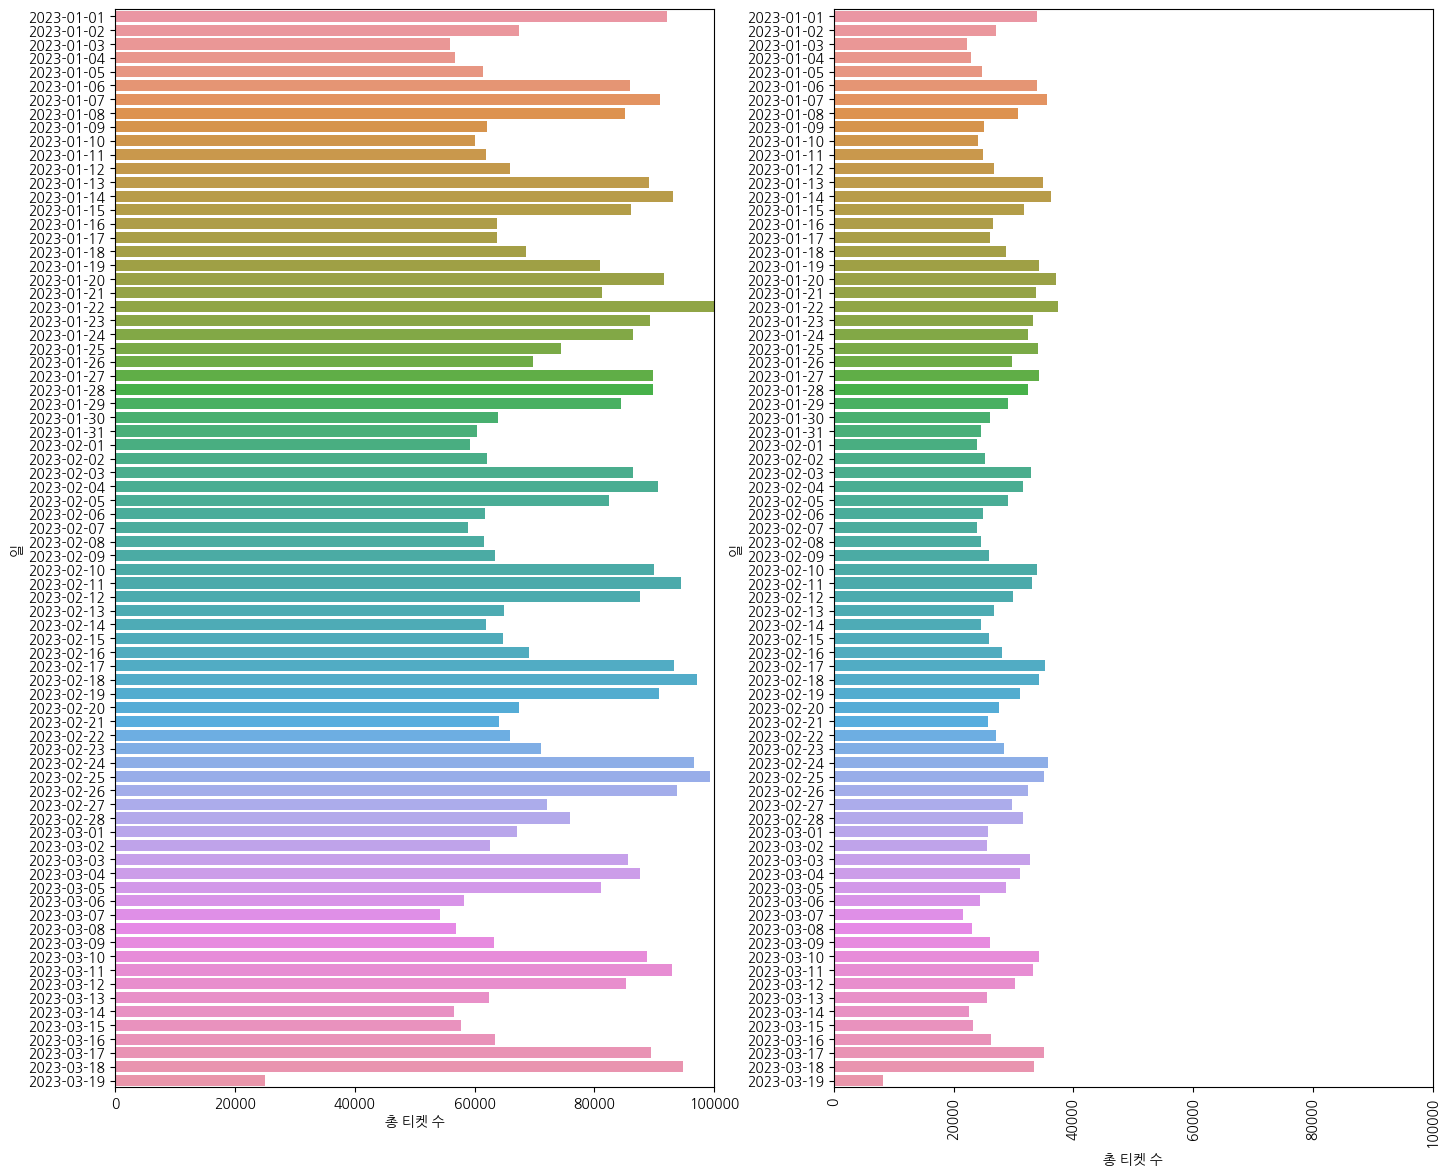

In [122]:
#총 티켓 수가 가장 많았던 날 (refund)
#경부선, 호남선 둘 다 총 티켓수가 많았던 날이 1월 22일임.. 그니까 설날에 티켓 제일 많이 발권
#티켓 수의 주기성 발견!

print(refund_gyungbu[refund_gyungbu['총 티켓 수']==refund_gyungbu['총 티켓 수'].max()])
print(refund_honam[refund_honam['총 티켓 수']==refund_honam['총 티켓 수'].max()])

fig,axs = plt.subplots(1,2, figsize=(17,14))
ax1 = axs[0]
sns.barplot(data = refund_gyungbu,x='총 티켓 수',y='일',ax=ax1, orient='h')
ax1.set_xlim(0,100000)
plt.xticks(rotation=90)
ax2 = axs[1]
sns.barplot(data = refund_honam, x='총 티켓 수', y='일',ax=ax2, orient='h')
ax2.set_xlim(0,100000)

In [123]:
#평균 티켓 환불정도 (refund)
#경부선, 호남선 둘 다 총 티켓수가 많았던 날이 1월 22일임.. 그니까 설날에 티켓 제일 많이 발권
#티켓 수의 주기성 발견!

(0.0, 100000.0)

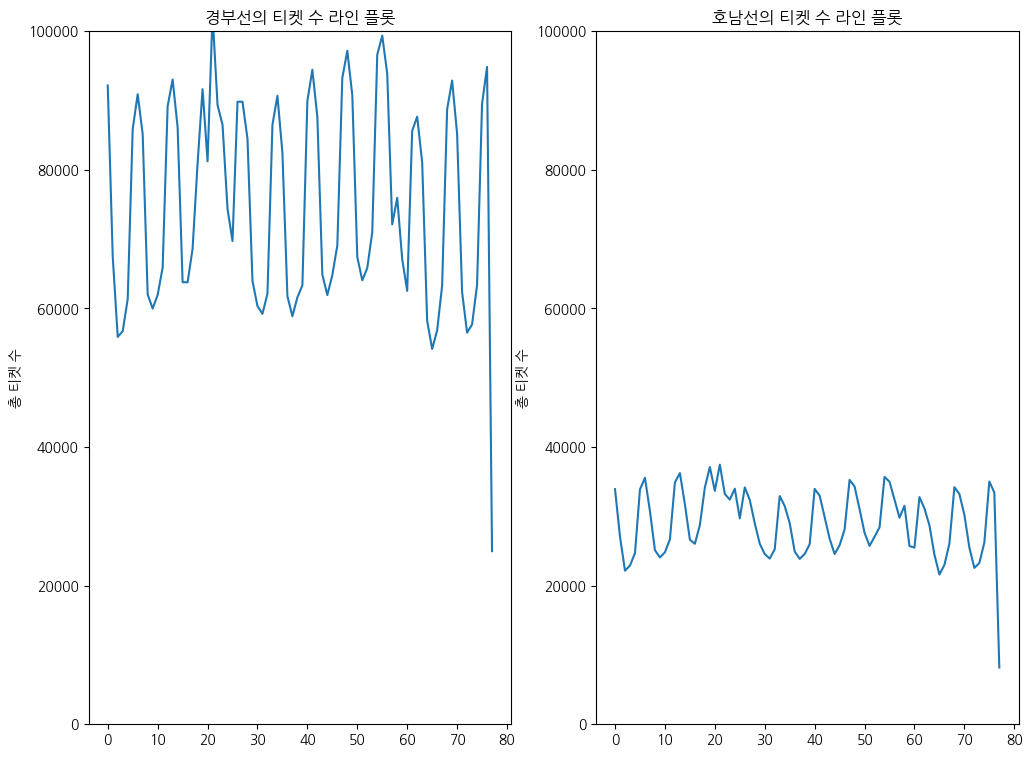

In [124]:
# 총 티켓 수의 주기가 보여서 선 그래프로 다시 표현 (refund)
# 라인플롯으로 표시하니 주기성이 확실히 보임
# 이 주기성은 뭘까?

fig,axs = plt.subplots(1,2, figsize=(12,9))
ax1 = axs[0]
sns.lineplot(data=refund_gyungbu, x=refund_gyungbu.index, y='총 티켓 수', ax=ax1)
ax1.set_title('경부선의 티켓 수 라인 플롯')
ax1.set_ylim(0,100000)
ax2 = axs[1]
sns.lineplot(data=refund_honam, x=refund_honam.index, y='총 티켓 수', ax=ax2)
ax2.set_title('호남선의 티켓 수 라인 플롯')
ax2.set_ylim(0,100000)

(0.0, 95000.0)

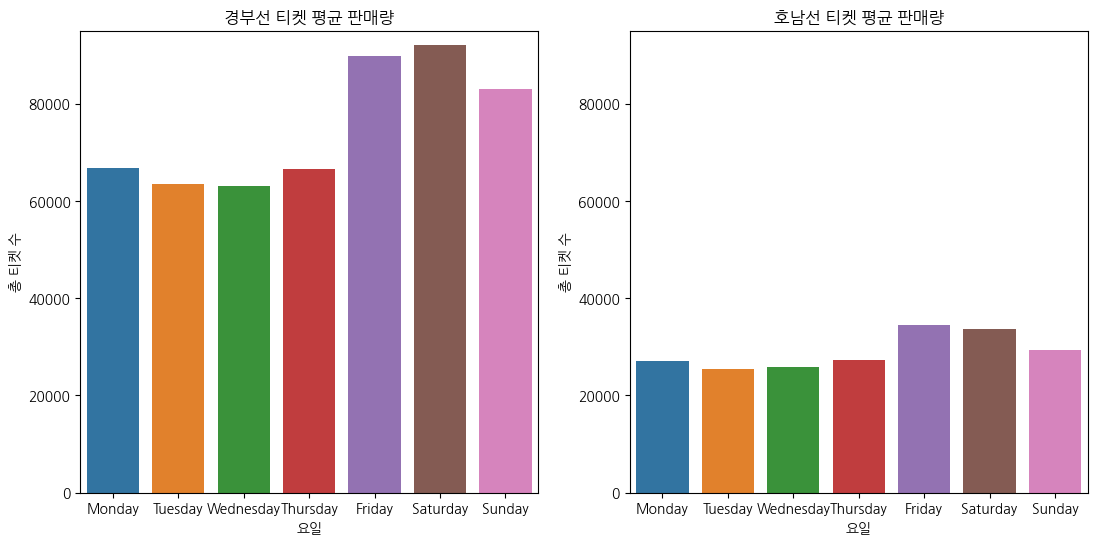

In [125]:
# 경부선 티켓 판매의 총량 주기성은 뭔지 알아본 결과 (refund)
# SRT의 월~목까지의 총 티켓 판매량은 저조하다가 금~일의 티켓 판매량이 높은 것을 볼 수있었음.
# 즉, SRT 티켓 판매의 주기는 월~목에는 비교적 저조한 편이나, 경부선, 호남선 둘다 금~일까지는 티켓 판매가 활발한 편임

table1  = refund_gyungbu.groupby('요일')[['총 티켓 수','환불정도']].mean().sort_values(['총 티켓 수']).reset_index()
table2 = refund_honam.groupby('요일')[['총 티켓 수','환불정도']].mean().sort_values(['총 티켓 수']).reset_index()
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 

fig, axs = plt.subplots(1,2,figsize=(13,6))

ax1 = axs[0]
sns.barplot(table1, x='요일', y='총 티켓 수', order=order, ax=ax1)
ax1.set_ylim(0,95000)
ax1.set_title('경부선 티켓 평균 판매량')
ax2 = axs[1]
sns.barplot(table2, x='요일', y='총 티켓 수', order=order, ax=ax2)
ax2.set_title('호남선 티켓 평균 판매량')
ax2.set_ylim(0,95000)

Text(0.5, 1.0, '호남선 요일별 평균 환불 정도')

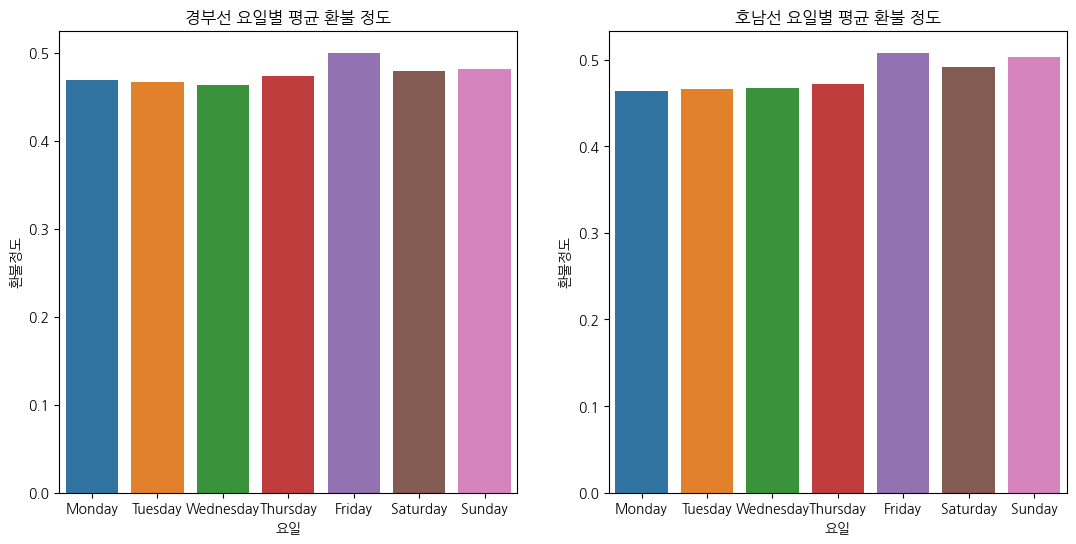

In [126]:
# 티켓 환불정도는 요일 당 어떻게 될까? (refund)
# 경부선, 호남선 둘다 모든 요일 환불률이 45% 이상을 차지하고 있음.금요일의 경우 50%를 넘기도 함. 호남선의 경우 금,일 환불률이 50%를 넘음


table1 = refund_gyungbu.groupby(['요일'])['환불정도'].mean().reset_index()
table2 = refund_honam.groupby(['요일'])['환불정도'].mean().reset_index()

fig, axs = plt.subplots(1,2,figsize=(13,6))

ax1 = axs[0]
sns.barplot(table1, x='요일', y='환불정도', order=order, ax=ax1)
ax1.set_title('경부선 요일별 평균 환불 정도')
ax2 = axs[1]
sns.barplot(table2, x='요일', y='환불정도', order=order, ax=ax2)
ax2.set_title('호남선 요일별 평균 환불 정도')

In [127]:
#티켓의 평균구입일자는 언제일까? (refund)
print(refund_gyungbu['평균구입일자'].dt.days.value_counts().sort_index().to_frame())
print(refund_honam['평균구입일자'].dt.days.value_counts().sort_index().to_frame())

        count
평균구입일자       
8           2
9           2
10          2
11          3
12          4
13          4
14          6
15         54
21          1
        count
평균구입일자       
8           2
9           2
10          2
11          4
12          4
13          3
14          6
15         54
21          1


In [128]:
gyungbu[(gyungbu['운행일자']==f'2023-01-2') & (gyungbu['발매창구종류명']=='스마트폰')]['운행일자'].iloc[0]

Timestamp('2023-01-02 00:00:00')

<Axes: xlabel='발매역명', ylabel='count'>

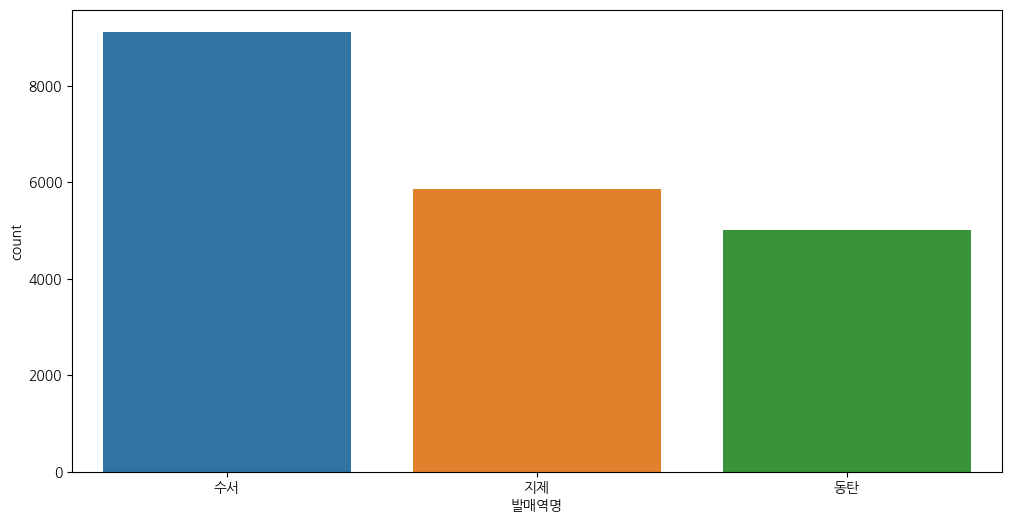

In [129]:
#발권하는 곳이 가장 많은 곳은 어디일까? (station)
plt.figure(figsize=(12,6))
table = by_station['발매역명'].value_counts().reset_index()
sns.barplot(table, x='발매역명', y='count')

In [153]:
#도착역 코드와 출발역 코드는 필요가 없으므로 drop함 (stop_station)
#승차인원수가 가장 많은 역을 합계로 정리하여 데이터 프레임 만듦. (stop_station)
#stop_station = stop_station.drop(columns=['도착역코드','출발역코드'])
stop_station['운행연월'] = pd.to_datetime(stop_station['운행연월'], format='%Y%m')

start_date = '2022-08-01'
end_date = '2023-11-01'

#freq를 ms로 설정하면 말일에서 끊기는게 아니라 진짜 시작일부터 한달 주기로만 date_range를 만듬
time_list = pd.date_range(start=start_date, end=end_date, freq='MS')
results = []

for i in time_list:
    r = stop_station.loc[stop_station['운행연월']==i,]
    r = r.sort_values('승차인원수', ascending=False)
    results.append(r)
max_station = pd.concat(results, ignore_index=True)
max_station = max_station[['출발역명','도착역명','운행연월','승차인원수']]

In [181]:
max_station

,출발역명,도착역명,운행연월,승차인원수,출발도착
0,수서,부산,2022-08-01,95429,수서부산
1,부산,수서,2022-08-01,94732,부산수서
2,수서,동대구,2022-08-01,76565,수서동대구
3,동대구,수서,2022-08-01,74172,동대구수서
4,광주송정,수서,2022-08-01,57773,광주송정수서
...,...,...,...,...,...
4293,마산,진영,2023-11-01,2,마산진영
4294,창원중앙,창원,2023-11-01,1,창원중앙창원
4295,구례구,곡성,2023-11-01,1,구례구곡성
4296,공주,곡성,2023-11-01,1,공주곡성


In [162]:
#역별 이용자 수를 체크하기 위해서 데이터 열 생성 (stop_station)
max_station['출발도착'] = max_station['출발역명'] + max_station['도착역명']
max_station['출발도착'].unique()

array(['수서부산', '부산수서', '수서동대구', '동대구수서', '광주송정수서', '수서광주송정', '수서대전',
       '대전수서', '수서천안아산', '천안아산수서', '수서평택지제', '평택지제수서', '오송수서', '부산동대구',
       '수서동탄', '수서오송', '수서익산', '익산수서', '동대구부산', '수서울산', '울산수서', '동탄수서',
       '대전부산', '부산대전', '동탄부산', '부산동탄', '동탄동대구', '동대구동탄', '동대구대전', '대전동대구',
       '동대구울산', '울산동대구', '동탄광주송정', '광주송정동탄', '목포수서', '수서목포', '부산평택지제',
       '평택지제부산', '수서신경주', '신경주수서', '부산오송', '부산울산', '오송부산', '동탄대전',
       '평택지제동대구', '동대구평택지제', '대전동탄', '천안아산부산', '울산부산', '동탄천안아산', '동대구신경주',
       '신경주동대구', '오송동탄', '동탄오송', '부산천안아산', '천안아산동탄', '수서김천구미', '오송광주송정',
       '울산대전', '대전울산', '광주송정오송', '김천구미수서', '익산동탄', '부산신경주', '수서나주',
       '신경주부산', '나주수서', '동탄익산', '익산광주송정', '광주송정익산', '동탄울산', '천안아산대전',
       '정읍수서', '광주송정평택지제', '광주송정천안아산', '대전천안아산', '평택지제광주송정', '수서정읍',
       '울산동탄', '동대구오송', '천안아산동대구', '천안아산광주송정', '동대구천안아산', '대전신경주',
       '신경주대전', '수서서대구', '오송평택지제', '오송동대구', '김천구미동대구', '오송익산', '동탄평택지제',
       '동대구김천구미', '평택지제대전', '익산오송', '울산천안아산', '대전평택지제', '천안아산울산', '서대구수서',
    

In [180]:
#출발역과 도착역명이 항상 같은지 체크(max_station)
print(sorted(stop_station['출발역명'].unique()))
print(sorted(stop_station['도착역명'].unique()))

['곡성', '공주', '광주송정', '구례구', '김천구미', '나주', '남원', '대전', '동대구', '동탄', '마산', '목포', '밀양', '부산', '서대구', '수서', '순천', '신경주', '여수EXPO', '여천', '오송', '울산', '익산', '전주', '정읍', '진영', '진주', '창원', '창원중앙', '천안아산', '평택지제', '포항']
['곡성', '공주', '광주송정', '구례구', '김천구미', '나주', '남원', '대전', '동대구', '동탄', '마산', '목포', '밀양', '부산', '서대구', '수서', '순천', '신경주', '여수EXPO', '여천', '오송', '울산', '익산', '전주', '정읍', '진영', '진주', '창원', '창원중앙', '천안아산', '평택지제', '포항']


<Axes: title={'center': '2022년 08월부터 2023년 11월까지 역방문횟수'}, xlabel='역방문횟수', ylabel='출발역명'>

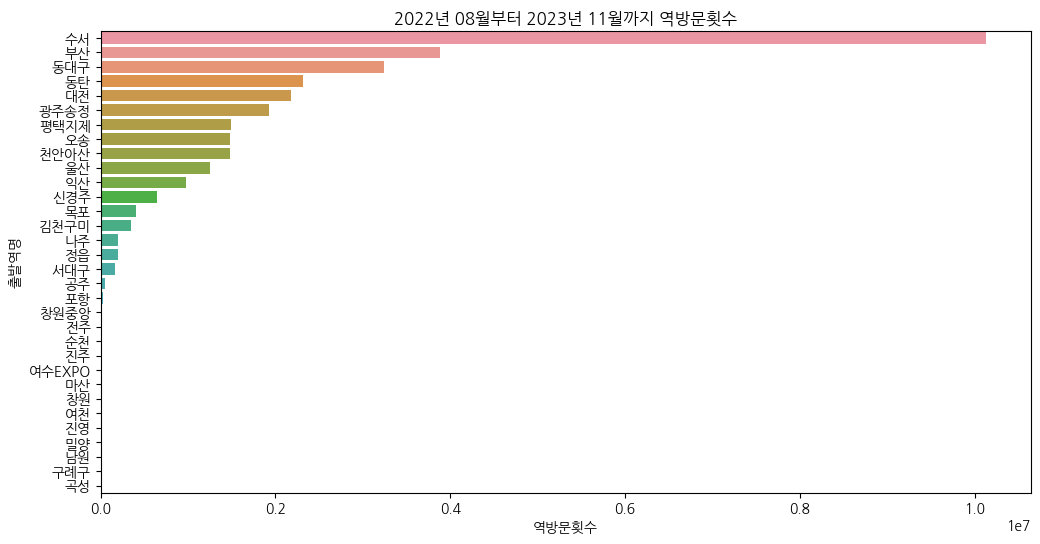

In [217]:
#역별 출발도착 총 이용자 수를 나타내고 그래프로 나타내기 (max_station)(202208월부터 202311월까지)
temp_list = []
for i in sorted(max_station['출발역명'].unique()):
    temp_list.append(max_station.loc[max_station['출발역명'].str.contains(i)].groupby('출발역명')['승차인원수'].sum())

temp = pd.concat(temp_list).to_frame().sort_values('승차인원수', ascending=False)
temp = temp.rename(columns={'승차인원수':'역방문횟수'})
plt.figure(figsize=(12,6))
plt.title('2022년 08월부터 2023년 11월까지 역방문횟수')
sns.barplot(temp, x = '역방문횟수', y=temp.index, orient='h')

SRT 경부선의 경우, 부산역 → 울산역 → 신경주역 → 동대구역 → 서대구역 → 김천구미역 → 대전역 → 오송역 → 천안아산역 → 평택지제역 → 동탄역 → 수서역 (서울 상행선)

SRT 호남선의 경우, 목포역 → 나주역 → 광주송정역 → 정읍역 → 익산역 → 공주역 → 오송역 → 천안아산역 → 평택지제역 → 동탄역 → 수서역 (서울 상행선)

SRT 전라선의 경우, 여수EXPO -> 여천 -> 순천 -> 구래구 -> 곡성 -> 남원 -> 전주 -> 익산 -> 공주 -> 오송 -> 천안아산 -> 평택지제 -> 동탄 -> 수서 (서울 상행선)

SRT 경전선의 경우, 진주 -> 마산 -> 창원 -> 창원중앙 -> 진영 -> 밀양 -> 동(서)대구 -> 김천구미 -> 대전 -> 오송 -> 천안아산 -> 평택지제 -> 동탄 -> 수서 (서울 상행선)

SRT 동해선의 경우, 포항 -> 동(서)대구 -> 김천구미 -> 대전 -> 오송 -> 천안아산 -> 평택지제 -> 동탄 -> 수서 (서울 상행선)

수서, 동탄, 평택지제역은 모든 노선이 같이 사용하는 공용역이다.

1. 수서역이 가장 많은 이유는 수서역이 모든 SRT 노선들의 시작점과 끝점인 이유도 있어서 이용자가 많을 수 있을 것 같다. 기본적으로 수요가 엄청나다. 그치만, 시작지과 종착지라고 해도 부산보다 이용횟수가 3배 많은 다른 이유가 이유가 있을 것 같다.
2. 부산역의 경우 역이용횟수 2위를 차지하며,공용역이 아님에도 불구하고 수요가 많았다. 동대구 역시도 공용역이 아님에도 3위이다. 
3. 동탄의 경우 수도권에서 가장 수요가 많은 역이었다, 
4. 대전의 경우 이용빈도가 많다. 이유가 무엇인지 궁금하다. 찾아본 결과 강남지역과 세종시 및 대전을 연결하는 가장 빠른 교통수단이 SRT라고 한다. (세종이나 대전으로 출근하시는 공무원분들)
5. 경기도 지역 사람들의 평택지제나 천안아산을 목적지로 하는 출퇴근 및 통학 수요가 많아 평택지제나 천안아산도 많다고 한다.  
6. 광주송정역은 호남선에서 가장 많이 이용하는 역이다.오송역은..?? 모르겠다 왜 수요가 많은지
7. 전라선에서 가장 수요가 많은 역은 익산역이다.
8. 경전선에서 가장 수요가 많은 역은 김천구미역이다.
9. 동해선에서 가장 수요가 많은 곳은 포항역이다.
10. 전반적으로 수요가 많은 노선은 경부선이다. 부산, 울산, 경주, 대구, 김천구미, 대전, 오송, 천안아산, 평택지제, 동탄, 수서 다 수요 많음.(수익성이 가장 극대화되는 노선)
11. 반면에 수요가 가장 없는 노선은 전라선이다. (수익성이 가장 없는 노선..)


In [220]:
print(max_station['출발역명'].value_counts(ascending=False))
print(max_station['도착역명'].value_counts(ascending=False))
max_station

,출발역명,도착역명,운행연월,승차인원수,출발도착
0,수서,부산,2022-08-01,95429,수서부산
1,부산,수서,2022-08-01,94732,부산수서
2,수서,동대구,2022-08-01,76565,수서동대구
3,동대구,수서,2022-08-01,74172,동대구수서
4,광주송정,수서,2022-08-01,57773,광주송정수서
...,...,...,...,...,...
4293,마산,진영,2023-11-01,2,마산진영
4294,창원중앙,창원,2023-11-01,1,창원중앙창원
4295,구례구,곡성,2023-11-01,1,구례구곡성
4296,공주,곡성,2023-11-01,1,공주곡성


EDA,시각화 데이터 분석 내용 정리:

1. 스마트폰으로 티켓을 발권하는 경우가 가장 많았으며, 그 다음은 인터넷 발권을 하는 경우가 뒤를 이었는데, 역에서 발권하는 양과 비슷했다. 따라서, 대세는 스마트폰으로 발권하는 것이 대세이다.

2. 티켓을 가장 많이 구매한 날(2023년 1월 1일부터 2023년 3월 19일까지 데이터)은 1월 22일이다. (2023년 기준 설날 연휴 시작일)

3. 티켓 환불율이 가장 높은 날은 2023년 1월 22일이다. (역시 설날 연휴 시작날)

4. 경부선과 호남선의 경우 티켓 판매의 양이 주기성을 띄었는데, 월~목에는 서로 비슷한 티켓 판매량이 보이다가 금요일 이후 비교적 급격히 티켓 판매량이 상승하는 주기성을 보임.

5. 경부선, 호남선의 경우 티켓(스마트폰 기준) 환불률의 경우 모든 요일이 평균적으로 구매한 티켓의 45% 이상 티켓 환불을 하고 있었으며 경부선의 경우 금요일에는 구매한 티켓의 50%정도가 환불되고 있었음. 호남선의 경우에는 금,일요일이 구매한 티켓의 50%정도가 환불되고 있었음. 

6. 티켓 발매일과 운행일의 차이는 15일이 가장 많이 보이고 있으며, 즉, 티켓을 구매한 날은 15일 전이 가장 많았다는 뜻으로 보통 15일 전에 많이 구매한 티켓들이 많이 환불됐을 수 있음을 유추할 순 있음. 하지만 15일 전에 구매한 티켓이 가장 많이 환불되었다고 단정지을 수는 없음. 

7. 역에서 티켓이 많이 발급된 역의 순서는 수서->지제->동탄 순이다. (by_station 데이터프레임은 볼 게 별로 없다 ㅠㅠ)

8. SRT 정차역 데이터 프레임을 가지고 자체적으로 변환하여 SRT 이용자들이 어느 역을 가장 많이 이용하는지 보고 싶어 출발, 도착 두 열을 합쳐 출발도착열을 만들고 출발역명 열을 가지고 for문을 가지고 str.contains를 이용하여 데이터 프레임을 생성하여 시각화하였더니, 수서역을 이용하는 사람이 압도적으로 많음, 그다음은 부산, 동대구 동탄, 대전, 광주송정, 평택지제, 오송, 천안아산, 울산, 익산, 신경주, 목포, 김천구미, 나주, 정읍, 서대구 순이었음. 특이한점은 수서역 방문횟수가 2위인 부산역보다 약 3배정도에 육박한다는 점에서 SRT의 이용자는 주로 지방에서 서울, 서울에서 지방으로 출퇴근을 하는 사람, 혹은 명절의 고향방문, 출발지와 종착지가 무조건 수서로 시작하거나 끝나는 점 등 다양한 이유가 있을 것 같다. 

9. 종합적으로 정리하면 SRT의 경부선, 호남선을 보면 월~목까지 SRT를 이용하는 티켓 수량이 평이하다가 금,토,일에 급격히 뛰는 주기성이 발견되었다. 또한, 평균적으로 환불율이 평균적으로 45% 이상으로 나타나지만, 금요일의 경우 경부,호남선 둘다 환불율이 50%를 넘겼다는 점에서 직장 출퇴근, 혹은 주말 여행? 등이 높은 환불율에 요인이 될 수 있다. 또, 역의 이용횟수는 서울(수서)역이 가장 많기도 하고, 서울에 집이 있거나 직장이 많아 서울로 출퇴근하는 사람들이 환불하는 정도도 많을 것 같다는 생각이 든다! 반면, 전라선은 수요성과 수익성이 가장 없는 노선으로 SRT의 가장 많은 적자가 예상된다. 그치만 환불율이 가장 높지 않을 수도 있고 다른 노선에 비해 상대적으로 실수요가 가장 많을 수도 있을 것 같다는 생각이 든다.

10. 어느정도 될 것인가? 환불율을 예측하는 회귀 모델으로 가야될 것 같다!